# Prototype Constellation Maker
Flip Tanedo
13 May 2017

Goal: this is a prototype for playing with `scikit-image` to create a constellation maker. What it currently does:
1. Pulls the horse image from the `scikit-image` sample data
2. Converts the image into an outline using `skeletonize` in `skimage.morphology`
3. Generates a random starfield over the image
4. Identifies the stars on the starfield that are closest to the skeleton (constellation candidates)

From: http://scikit-image.org/docs/dev/auto_examples/edges/plot_skeleton.html#sphx-glr-auto-examples-edges-plot-skeleton-py

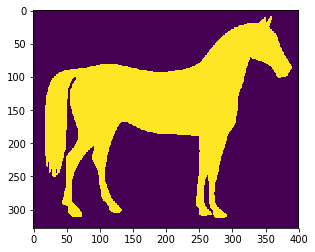

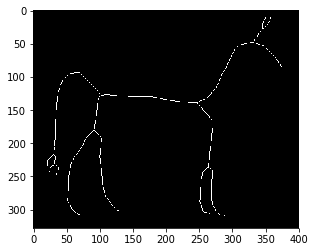

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
import skimage.io as io
from skimage.morphology import skeletonize
from skimage.util import invert
from random import randint

# Invert the horse image (from scikit image sample data)
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

plt.imshow(image)
plt.show()

plt.imshow(skeleton, cmap=plt.cm.gray)
plt.show()

In [9]:
HEIGHT = np.shape(skeleton)[0]
LENGTH = np.shape(skeleton)[1]
print(HEIGHT,LENGTH)

328 400


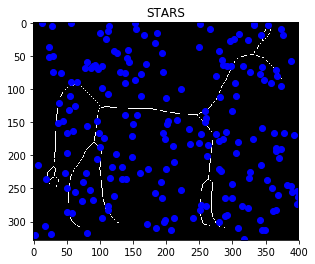

In [13]:
def pixel_distance(i,j,ii,jj):
    return np.sqrt((i-ii)**2 + (j-jj)**2)

NUMSTARS = 200
starx = []
stary = []
for i in range(0,NUMSTARS):
    starx.append(randint(0,LENGTH-1))
    stary.append(randint(0,HEIGHT-1))
    
plt.plot(np.array(starx), np.array(stary), 'bo')
plt.title("STARS")
plt.imshow(skeleton, cmap=plt.cm.gray)
plt.show()

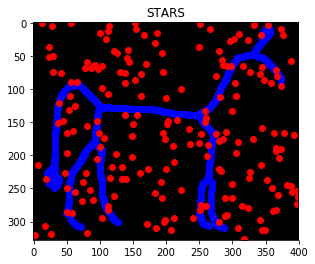

In [31]:
def one_dimensionalize(skeleton_image):
    """
    Stores points that are in the skeleton.
    Points are a list of pairs.
    i.e. [ [x0,y0], [x1,y1], ... ]
    """
    outline = []
    for ii in range(0,LENGTH-1):
        for jj in range(0,HEIGHT-1):
            if skeleton_image[jj,ii]:
                outline.append([ii,jj])
    return outline

def skeleton_x_and_y_lists(skeleton_image):
    """
    Same as one_dimensionalize,
    but directly gives a list of x-values
    and a list of y-values
    """
    xx = []
    yy = []
    for ii in range(0,LENGTH-1):
        for jj in range(0,HEIGHT-1):
            if skeleton_image[jj,ii]:
                xx.append(ii)
                yy.append(jj)
    return xx, yy


skelxx, skelyy = skeleton_x_and_y_lists(skeleton)


plt.title("STARS")
plt.imshow(skeleton, cmap=plt.cm.gray)
# use this imshow to plot "right-size up"
plt.plot(np.array(skelxx), np.array(skelyy), 'bo')
plt.plot(np.array(starx), np.array(stary), 'ro')
plt.show()

In [33]:
def closest_skeleton(ii, jj, skelxx, skelyy):
    """
    Returns point from skelxx, skelyy that is
    closest to the given ii, jj point and the 
    Euclidean distance.
    """
    # Initialize
    closestx = skelxx[0]
    closesty = skelyy[0]
    closestd = np.sqrt(HEIGHT**2 + LENGTH**2)
    
    for a in range(0,np.size(skelxx)):
        if pixel_distance(ii,jj,skelxx[a],skelyy[a]) < closestd:
            closestx = skelxx[a]
            closesty = skelyy[a]
            closestd = pixel_distance(ii,jj,skelxx[a],skelyy[a])
    return closestx, closesty, closestd

closest_skeleton(0,0,skelxx,skelyy)

(53, 96, 109.65856099730654)

In [35]:
def stars_and_closest_skeleton(starxx, staryy, skelxx, skelyy):
    """
    Gives unordered list of star positions, the skeleton position
    that is closest, and the distance between them.
    """
    allpoints=[]
    for a in range(0, np.size(starxx)):
        closex, closey, closed = closest_skeleton(starxx[a], staryy[a], skelxx, skelyy)
        allpoints.append([starxx[a],staryy[a],closex,closey,closed])
    
    return allpoints

unordered_points = stars_and_closest_skeleton(starx, stary, skelxx, skelyy)

In [61]:
uop = np.array(unordered_points)
op = uop[uop[:,4].argsort()]
print(op[0:10])

[[  38.          121.           38.          121.            0.        ]
 [  96.          149.           96.          149.            0.        ]
 [ 251.          283.          251.          283.            0.        ]
 [ 258.          133.          258.          133.            0.        ]
 [  50.          285.           51.          285.            1.        ]
 [ 100.          187.           99.          188.            1.41421356]
 [ 113.          282.          112.          283.            1.41421356]
 [ 298.           65.          299.           66.            1.41421356]
 [ 366.           71.          365.           72.            1.41421356]
 [  51.          250.           53.          250.            2.        ]]


In [64]:
NUMSTARS = 20
beststarx=op[0:20][:,0]
beststary=op[0:20][:,1]

print(beststarx)
print(beststary)

[  38.   96.  251.  258.   50.  100.  113.  298.  366.   51.  253.  343.
   19.  259.   37.  373.  112.  367.  282.  280.]
[ 121.  149.  283.  133.  285.  187.  282.   65.   71.  250.  275.   19.
  236.  150.  151.   96.  277.   81.  112.  301.]


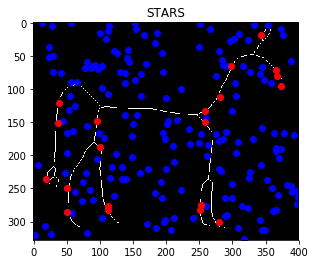

In [73]:
plt.title("STARS")
plt.imshow(skeleton, cmap=plt.cm.gray)
# plt.imshow(image)
# use this imshow to plot "right-size up"
plt.plot(np.array(starx), np.array(stary), 'bo')
plt.plot(beststarx, beststary, 'ro')
plt.show()

The output so far: identification of the 10 (`NUMSTARS`) best candidates for starts to be included in the constellation.

Moving forward:
1. Develop a module that takes generic images and converts them into reasonable outlines.
2. 